In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Text3D
import math

In [39]:
#constante Gravitationnelle (m**3*kg**(-1)*s**2)
G= 6.6742*10**(-11)
#Masse de Saturne
Ms=5.683*10**26
#rayon de Saturne (km)
r_saturne=58232
#rayon min (km)
r_min=60000
#rayon max (km)
r_max=302500
B_o=1
#masse d'une particule (kg)
mp=1
#charge (C)
q=1
#vitesse initiale (m/s)
v_int=0.1
#angle particule (radian)
a_p=0.5
#position x initiale
x_int=-0.1
#position y initiale
y_int=0
#position z initiale
z_int=0
#temps maximal
t_max=100

w=(q*B_o)/mp

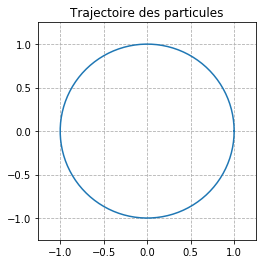

In [40]:
import numpy as np
import matplotlib.pyplot as plt

theta = np.linspace(0, 2*np.pi, 100)

r = np.sqrt(1.0)

x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect(1)

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')
plt.title("Trajectoire des particules")

plt.show()

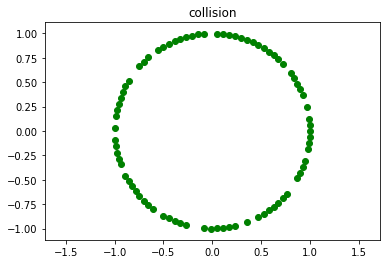

In [41]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("collision")
from random import *
i=0
liste=[]
nbrcol=0
while(i<99):
    j=randint(0, 5)    
    if(j!=1):
        liste.append(theta[i])
    if(j==1):
        nbrcol=nbrcol+1
    i=i+1  

        
x=np.cos(liste)
y=np.sin(liste)
plt.scatter(x,y,c='g')


plt.axis("equal")

plt.show()

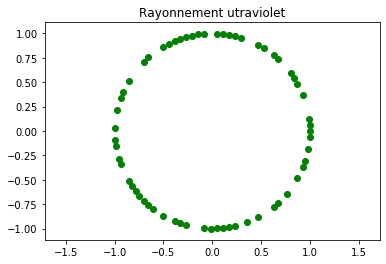

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.title("Rayonnement utraviolet")
from random import *
i=0
listebis=[]
nbruv=0
while(i<99-nbrcol):
    j=randint(0, 3)    
    if(j!=1):
        listebis.append(liste[i])
    if(j==1):
        nbruv=nbruv+1
    i=i+1  

        
x=np.cos(listebis)
y=np.sin(listebis)
plt.scatter(x,y,c='g')
plt.axis("equal")
plt.show()

In [44]:
boulo=nbrcol

In [45]:
# --- Importer les bibliothèques utilisées ---- #
from random import randint
from math import sqrt

#--- Variables ---#
x,y=150,10
dx,dy=10,10
flag=0
balles=[]
nbrbal=int(input("Choisissez le nombre de balles"))  
    
def anime():
    for i in range(0,len(balles)):
        balles[i].bounce()
        balles[i].move()
        
    fenetre.after(50,anime)
    
def start():
    global flag
    flag=1
    for i in range(0,len(balles)):
        balles[i].start()
    anime()
def stop():
    global flag
    flag=0
    for i in range(0,len(balles)):
        balles[i].stop()


# --- Fenêtre principale --- #
from tkinter import *
fenetre = Tk()
fenetre.geometry('350x300')
can = Canvas(fenetre,bg='dark grey',height=250, width=250)
can.pack(side=LEFT,padx=5,pady=5)

# --- COMMANDES --- # 
boutonGO = Button(fenetre, text='GO', width =3,command=start)
boutonGO.pack(side=BOTTOM)
boutonSTOP = Button(fenetre, text='STOP', width =3,command=stop)
boutonSTOP.pack(side=BOTTOM)
    
class Balles(object):
    def __init__(self, rayon, couleur,x,y,dx,dy,oldspeedx,oldspeedy,i,nextx,nexty,valeur):
        self.rayon=rayon
        self.couleur=couleur
        self.x=x
        self.dx=dx
        self.y=y
        self.dy=dy
        self.oldspeedx=oldspeedx
        self.oldspeedy=oldspeedy
        self.i=i
        self.nextx=nextx
        self.nexty=nexty
        self.valeur=valeur
        self.oval=can.create_oval(self.x,self.y,self.x+10,self.y+10,width=2,fill=self.couleur)
       
    def start(self):
        self.dx,self.dy=self.oldspeedx,self.oldspeedy
                   
    def stop(self):
        self.oldspeedx,self.oldspeedy=self.dx,self.dy
        self.dx,self.dy=0,0

#--- Mouvement ---# 
    def move(self):          
        if self.x>240:
            self.dx=-self.dx
        if self.x<10:
            self.dx=-self.dx
        if self.y<10:
            self.dy=-self.dy
        if self.y>240:
            self.dy=-self.dy
        self.x,self.y=self.x+self.dx,self.y+self.dy
        can.coords(self.oval,self.x,self.y,self.x+10,self.y+10)

#-- Collision ---#
    def bounce(self):#la méthode qui observe les collisions
#on regarde la position ultérieure de la balle pour prévoir la collision
        self.nextx=self.x+self.dx
        self.nexty=self.y+self.dy
        for k in range(0,len(balles)):
            if not k == self.i:
            
                distance=sqrt((self.nextx-balles[k].nextx)**2+(self.nexty-balles[k].nexty)**2)
                 
                if distance<6:
                    
                     
                    memdx,memdy=self.dx,self.dy#on garde en mémoire le déplacement de la balle
#on échange les vitesses horizontales et verticales des deux balles
                    self.dx=sqrt(balles[k].dx**2+balles[k].dy**2)*(self.nextx-balles[k].nextx)/float(distance)
                    self.dy=sqrt(balles[k].dx**2+balles[k].dy**2)*(self.nexty-balles[k].nexty)/float(distance)
                    balles[k].dx=sqrt(memdx**2+memdy**2)*(balles[k].nextx-self.nextx)/float(distance)
                    balles[k].dy=sqrt(memdx**2+memdy**2)*(balles[k].nexty-self.nexty)/float(distance)

                    

            
                
    

for i in range(0,nbrbal):
    balles.append(Balles(5,"blue",randint(10,240),randint(10,240),0,0,randint(-5,5),randint(-2,2),i,0,0,0))
     
for j in range(nbrbal,nbrbal+boulo):
    balles.append(Balles(5,"red",randint(10,240),randint(10,240),0,0,randint(-5,5),randint(-2,2),j,0,0,0))

print (len(balles))
fenetre.mainloop()

Choisissez le nombre de balles10
16


In [35]:
import rebound
sim = rebound.Simulation()
sim.add(m=1)
sim.add(m=0.1, e=0.041, a=0.4, inc=0.2, f=0.43, Omega=0.82, omega=2.98)
sim.add(m=1e-3, e=0.24, a=1.0, pomega=2.14)
sim.add(m=1e-3, e=0.24, a=1.5, omega=1.14, l=2.1)
sim.add(a=-2.7, e=1.4, f=-1.5,omega=-0.7) # hyperbolic orbit

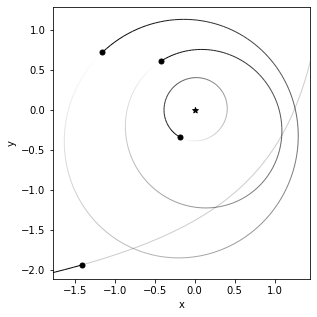

In [36]:
%matplotlib inline
fig, ax = rebound.OrbitPlot(sim)

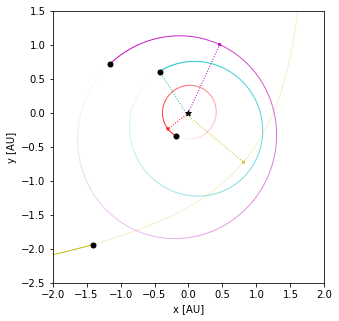

In [37]:
fig, ax = rebound.OrbitPlot(sim, unitlabel="[AU]", color=True, periastron=True, xlim=[-2,2], ylim=[-2.5,1.5])